In [70]:
# Importação dos pacotes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
# Carregando os dados
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Explorando os dados

In [4]:
# Valores nulos
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Valor médio da variavel target
target_mean = df["quality"].mean()
target_mean

5.6360225140712945

In [7]:
# Resumo estatístico
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


<AxesSubplot:>

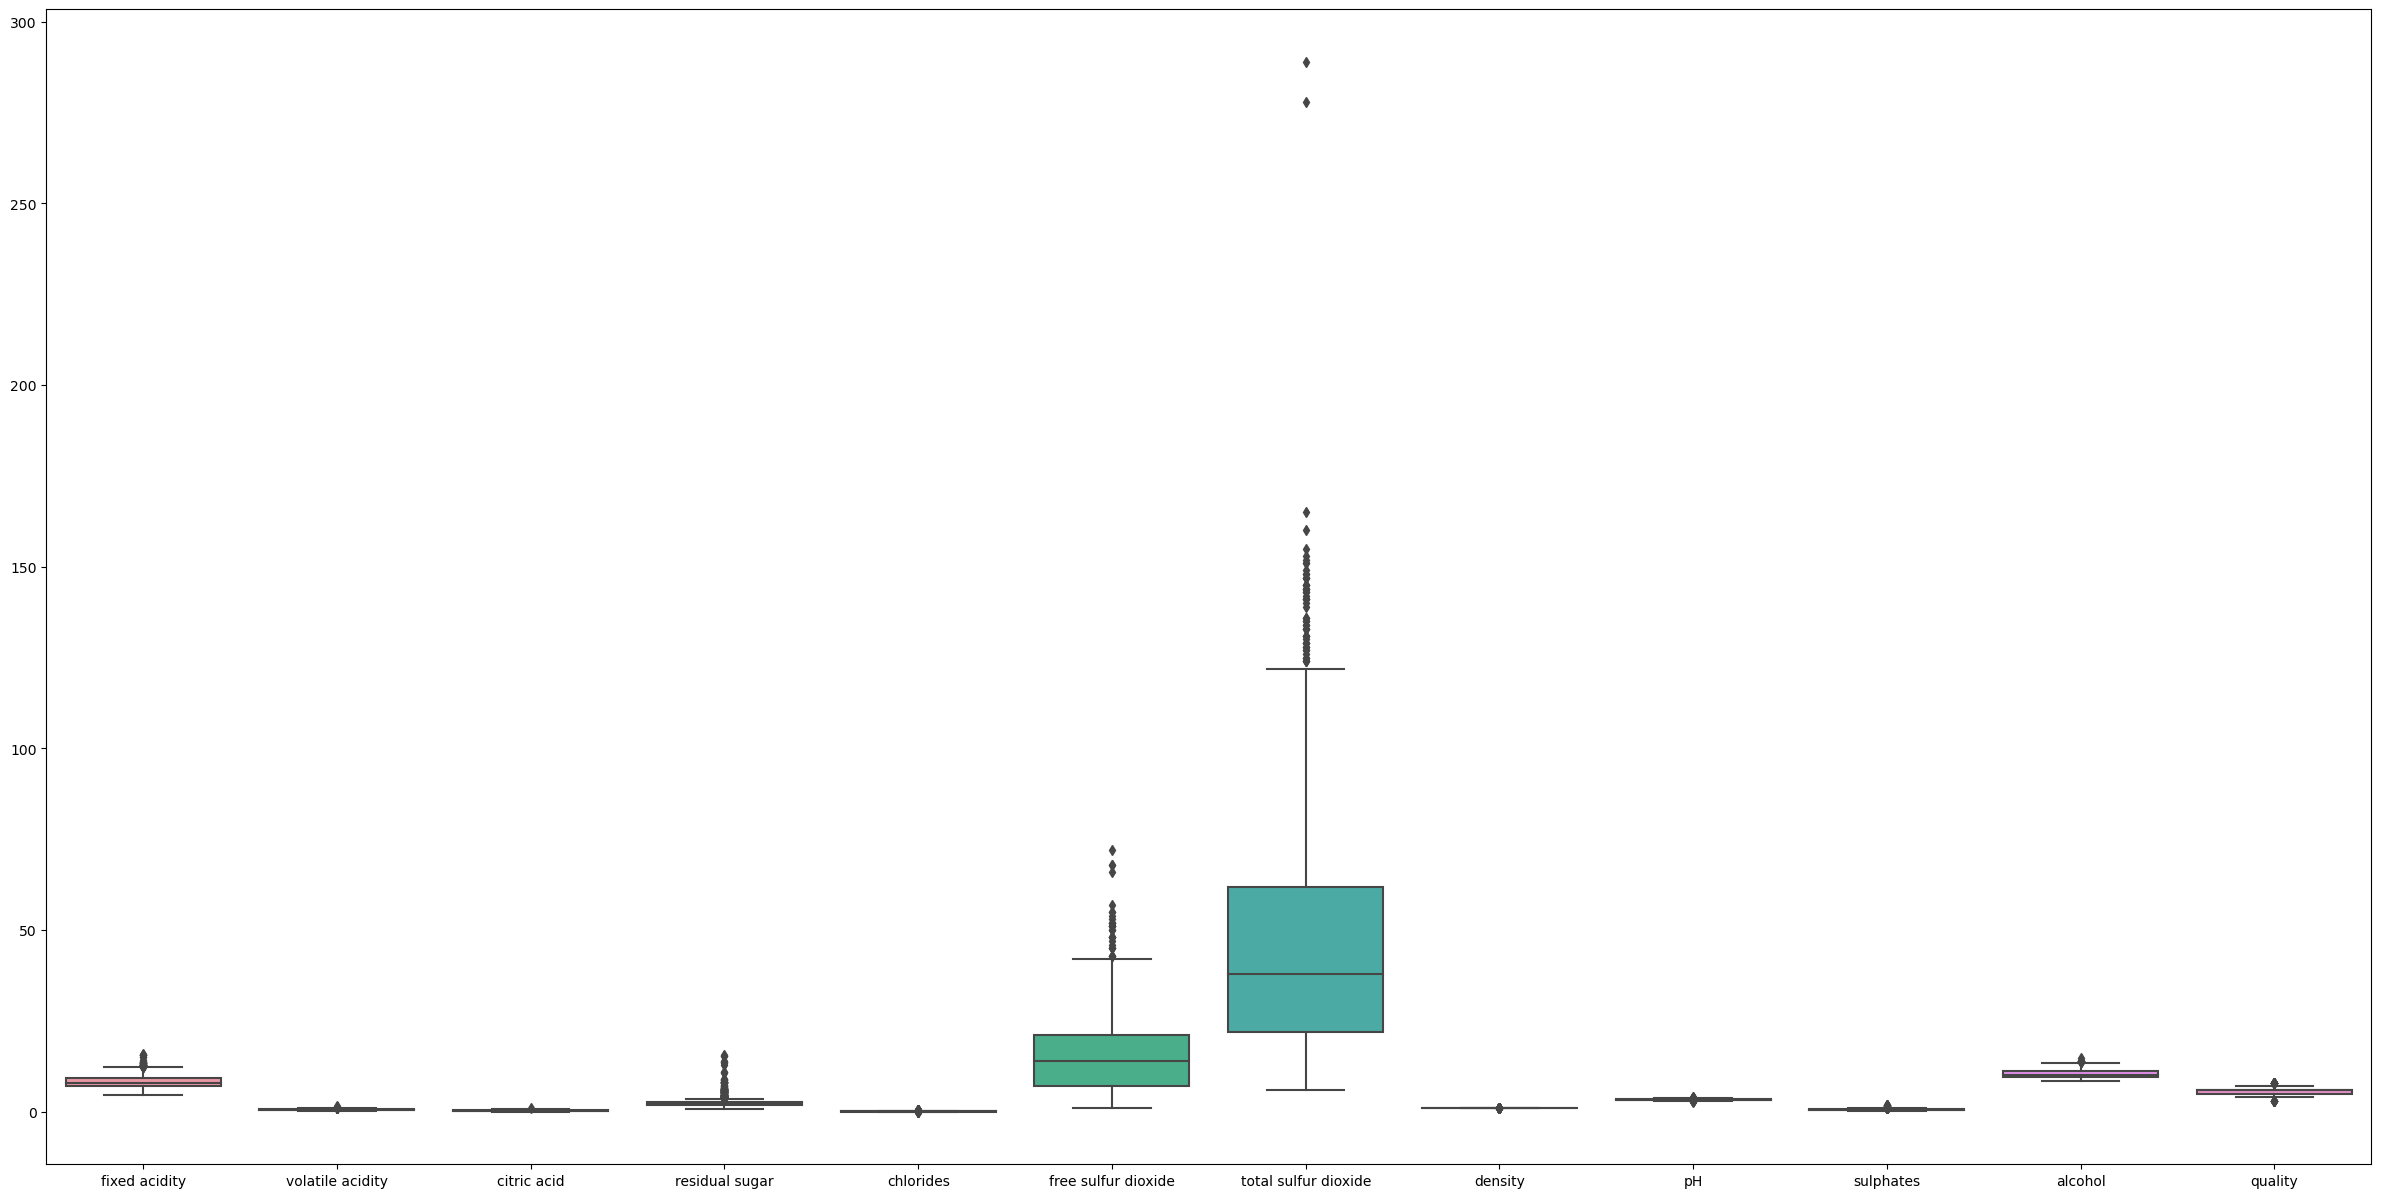

In [85]:
plt.figure(figsize=(30,15))
sns.boxplot(data=df)

<AxesSubplot:xlabel='quality', ylabel='count'>

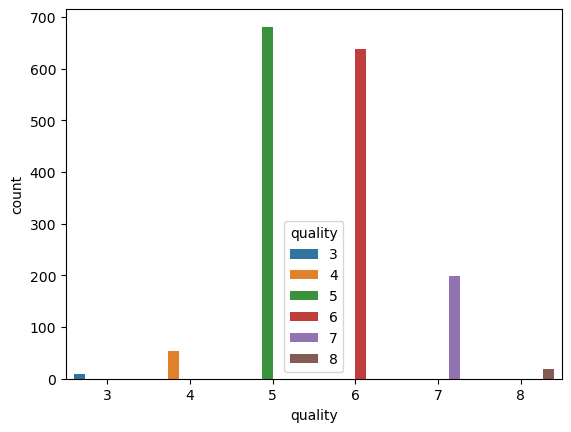

In [13]:
# Count plot target
sns.countplot(data=df, x=df['quality'], hue = 'quality')

In [34]:
# Corelação
df_corr = df.corr()['quality'].drop('quality')
print(df_corr.sort_values(ascending=False))

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


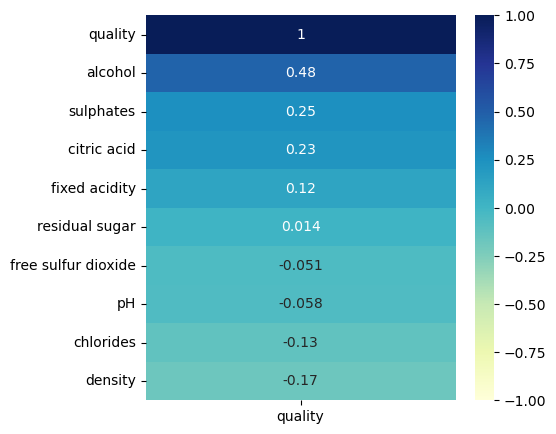

In [50]:
# Plot heatmap correlação
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr()[['quality']].sort_values('quality').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [67]:
# Seleção das variaveis
X = df[['alcohol', 'sulphates', 'citric acid', 'fixed acidity']]
y = df['quality'].values

In [68]:
X.head()

,alcohol,sulphates,citric acid,fixed acidity
0,9.4,0.56,0.00,7.4
1,9.8,0.68,0.00,7.8
2,9.8,0.65,0.04,7.8
3,9.8,0.58,0.56,11.2
4,9.4,0.56,0.00,7.4


In [103]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

# Criando o modelo
modelo = LinearRegression(normalize = False, fit_intercept = True)

# Treinamento do modelo
modelo_v1 = modelo.fit(X_train, y_train)


### Fazendo as previsões
- alcohol = 9.1
- sulphates = 0.6
- citric acid = 0
- fixed acidity = 7

In [104]:
print(modelo.predict([[9.8, 1, 0.1, 11.2]]))

[5.69999657]


### Avaliando o modelo

In [102]:
# Ordinary Least Square (OLS)
x = sm.add_constant(X_train)
model = sm.OLS(y_train, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.62e-80
Time:                        16:31:46   Log-Likelihood:                -1164.6
No. Observations:                1119   AIC:                             2339.
Df Residuals:                    1114   BIC:                             2364.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.0815      0.255      4.235

In [110]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
y_pred = modelo.predict(X_test)
print("MSE: ", mean_squared_error(y_test,y_pred))

MSE:  0.45907535370933056


In [113]:
# Quanto menor o MSE em comparação com o intervalo de dados, mais precisa é nossa previsão.
df_intervalo = df['quality'].unique()
df_intervalo

#São 5 valores e nossa margem de erro é 4,5907535E-18, o que significa que é decentemente preciso.

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [112]:
# MAPE
def mape(actual, pred):
  actual, pred = np.array(actual), np.array(pred)
  return np.mean(np.abs((actual - pred) / actual)) * 100
mape(y_test, y_pred)

# MAPE result Notes :

# Below 10% = Excellent
# 10%~20% = Good
# 21%~50% = Reasonable
# Above 50% = Inaccurate

9.714281240745853